In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import qeds
%matplotlib inline
import os
import math
import qeds
qeds.themes.mpl_style();

from IPython.display import display
import statistics

In [2]:
# Assuming 30/360 for Time to Maturity (in Years)
bonds = pd.read_csv('10Bonds.csv')
bonds

,bond_name,Maturity Date,Coupon,TimeTM 1,TimeTM 2,TimeTM 3,TimeTM 4,TimeTM 5,TimeTM 6,TimeTM 7,...,AI1,AI2,AI3,AI4,AI5,AI6,AI7,AI8,AI9,AI10
0,CAN 1.50 February 22,2/1/2022,1.50,0.056,0.053,0.050,0.047,0.044,0.036,0.033,...,0.0067,0.0066,0.0066,0.0065,0.0065,0.0064,0.0063,0.0063,0.0063,0.0062
1,CAN 1.50 May 22,5/1/2022,1.50,0.306,0.303,0.300,0.297,0.294,0.286,0.283,...,0.0029,0.0029,0.0028,0.0028,0.0028,0.0026,0.0026,0.0025,0.0025,0.0025
2,CAN 1.75 March 23,3/1/2023,1.75,1.139,1.136,1.133,1.131,1.128,1.119,1.117,...,0.0063,0.0063,0.0062,0.0062,0.0061,0.0060,0.0059,0.0059,0.0058,0.0058
3,CAN 1.50 June 23,6/1/2023,1.50,1.389,1.386,1.383,1.381,1.378,1.369,1.367,...,0.0042,0.0041,0.0041,0.0040,0.0040,0.0039,0.0038,0.0038,0.0038,0.0037
4,CAN 1.50 September 24,9/1/2024,1.25,2.639,2.636,2.633,2.631,2.628,2.619,2.617,...,0.0045,0.0045,0.0044,0.0044,0.0044,0.0043,0.0042,0.0042,0.0042,0.0041
5,CAN 1.25 March 25,3/1/2025,1.50,3.139,3.136,3.133,3.131,3.128,3.119,3.117,...,0.0054,0.0054,0.0053,0.0053,0.0053,0.0051,0.0051,0.0050,0.0050,0.0050
6,CAN 1.50 June 26,6/1/2026,1.25,4.389,4.386,4.383,4.381,4.378,4.369,4.367,...,0.0035,0.0034,0.0034,0.0034,0.0033,0.0032,0.0032,0.0032,0.0031,0.0031
7,CAN 1.25 March 27,3/1/2027,1.50,5.139,5.136,5.133,5.131,5.128,5.119,5.117,...,0.0054,0.0054,0.0053,0.0053,0.0053,0.0051,0.0051,0.0050,0.0050,0.0050
8,CAN 1.50 June 31,6/1/2031,1.50,9.389,9.386,9.383,9.381,9.378,9.369,9.367,...,0.0042,0.0041,0.0041,0.0040,0.0040,0.0039,0.0038,0.0038,0.0038,0.0037
9,CAN 1.50 December 31,12/1/2031,1.50,9.889,9.886,9.883,9.881,9.878,9.869,9.867,...,0.0017,0.0016,0.0016,0.0015,0.0015,0.0014,0.0013,0.0013,0.0013,0.0012


In [3]:
# changing DataFrame to a list in list

def lst(df, grp):
    y = df[grp].values.tolist()
    return y

cpn = lst(bonds, "Coupon")
name = lst(bonds, "bond_name")
p1 = lst(bonds, "Closing 1")
p2 = lst(bonds, "Closing 2")
p3 = lst(bonds, "Closing 3")
p4 = lst(bonds, "Closing 4")
p5 = lst(bonds, "Closing 5")
p6 = lst(bonds, "Closing 6")
p7 = lst(bonds, "Closing 7")
p8 = lst(bonds, "Closing 8")
p9 = lst(bonds, "Closing 9")
p10 = lst(bonds, "Closing 10")
t1 = lst(bonds, "TimeTM 1")
t2 = lst(bonds, "TimeTM 2")
t3 = lst(bonds, "TimeTM 3")
t4 = lst(bonds, "TimeTM 4")
t5 = lst(bonds, "TimeTM 5")
t6 = lst(bonds, "TimeTM 6")
t7 = lst(bonds, "TimeTM 7")
t8 = lst(bonds, "TimeTM 8")
t9 = lst(bonds, "TimeTM 9")
t10 = lst(bonds, "TimeTM 10")
ai1 = lst(bonds, "AI1")
ai2= lst(bonds, "AI2")
ai3 = lst(bonds, "AI3")
ai4 = lst(bonds, "AI4")
ai5 = lst(bonds, "AI5")
ai6 = lst(bonds, "AI6")
ai7 = lst(bonds, "AI7")
ai8 = lst(bonds, "AI8")
ai9 = lst(bonds, "AI9")
ai10 = lst(bonds, "AI10")


dates = ["Jan 10","Jan 11","Jan 12","Jan 13","Jan 14","Jan 17","Jan 18","Jan 19","Jan 20","Jan 21"]
p = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
ttm = [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10]

In [4]:
# Define the yield to maturity of bonds (Reference to Book, modify to c.c.)

def bond_ytm(price, par, T, coup, guess=0.05):
    T = float(T)
    coupon = coup/100
    dt = [(i+1)/2 for i in range(int(T))]
    ytm_func = lambda y: \
    sum([coupon*math.exp((-1)*y*t) for t in dt]) + par*math.exp((-1)*y*T) - price
    return optimize.newton(ytm_func, guess)

# Find all the YTM using each day's prices 
ytm_all = []
for price in p:
    for t in ttm:
        ytm_fl = []
        for i in range(10):
            y = bond_ytm(price[i],100,t[i],cpn[i])
            ytm_fl.append(y)
    ytm_float = [round(elem, 5) for elem in ytm_fl]
    ytm_all.append(ytm_float)
  

In [5]:
ytm_dict = {"ytm1": ytm_all[0], "ytm2": ytm_all[1], "ytm3": ytm_all[2], "ytm4": ytm_all[3],
           "ytm5": ytm_all[4], "ytm6": ytm_all[5], "ytm7": ytm_all[6], "ytm8": ytm_all[7],
           "ytm9": ytm_all[8], "ytm10": ytm_all[9]}

ttm_df = bonds[["TimeTM 1","TimeTM 2","TimeTM 3","TimeTM 4","TimeTM 5","TimeTM 6","TimeTM 7","TimeTM 8","TimeTM 9","TimeTM 10"]]
ttm_df.insert(0, "Bond Names", name)

ytm_df = pd.DataFrame(ytm_dict)
ytm_df.insert(0, "Bond Names", name)

ytms = pd.merge(ttm_df, ytm_df, how="outer")

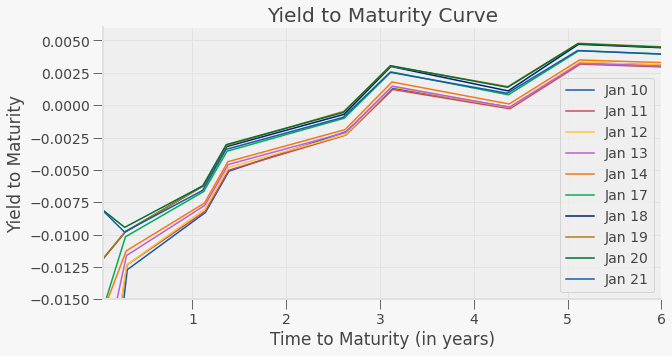

In [6]:
# Plot time on the x-axis (from year 0-5) and yield-to-maturity on the y-axis for each bond

plt.figure(figsize=(10,5))
plt.plot(ttm[0], ytm_all[0], label='Jan 10') 
plt.plot(ttm[1], ytm_all[1], label='Jan 11')
plt.plot(ttm[2], ytm_all[2], label='Jan 12')
plt.plot(ttm[3], ytm_all[3], label='Jan 13')
plt.plot(ttm[4], ytm_all[4], label='Jan 14')
plt.plot(ttm[5], ytm_all[5], label='Jan 17')
plt.plot(ttm[6], ytm_all[6], label='Jan 18')
plt.plot(ttm[7], ytm_all[7], label='Jan 19')
plt.plot(ttm[8], ytm_all[8], label='Jan 20')
plt.plot(ttm[9], ytm_all[9], label='Jan 21')
plt.xlabel('Time to Maturity (in years)')
plt.ylabel('Yield to Maturity')
plt.xlim([0.05,6])
plt.ylim([-0.015,0.006])
plt.title("Yield to Maturity Curve")
plt.legend();

# Find Spot rate 

empty list for bondyields

for i range(len(ttm))
    empty list for r
    r0 = -(log(price_list[0]/100)/time_list[0]
    append r0 into empty list for r
    sum = cpn[0] * math.exp(-r0 * time_list[0])
    for number in 1 to 9,
        newr = (math.log((Price_list[number] - sum)/cpn[number]))/(-time_list[number])
        empty list for r append newr
        sum = sum + cpn[number] * math.exp(- newr * time_list[number])
    append list_r to empty bondyields list
        

In [7]:
# Find Spot rates

y = []
for i in range(len(ttm)):
    t_list = ttm[i]
    p_list = p[i]
    r = []
    r0 = -(math.log(p_list[0]/100))/t_list[0]
    r.append(r0)
    x = cpn[0] * math.exp(-r0 * t_list[0])
    for n in range(1,10):
        newr = (-1)*(math.log((p_list[n] - x)/p_list[n]))/(t_list[n])
        r.append(newr)
        x = x + (cpn[n] * math.exp(- newr * t_list[n]))
    y.append(r)

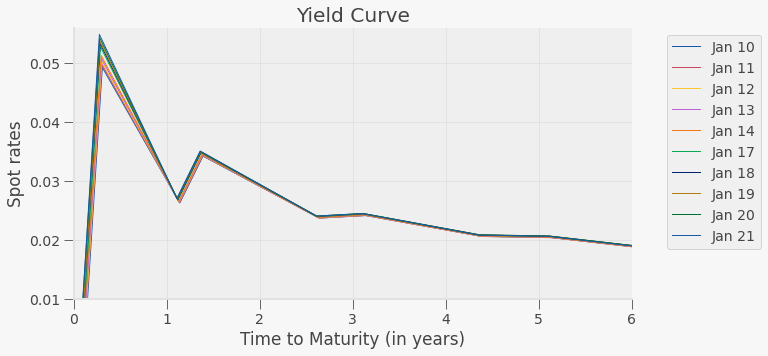

In [8]:
# Plot time to maturity on the x-axis and yields on the y-axis (each line is a day)

bondyield_dict = {"by1": y[0], "by2": y[1], "by3": y[2], "by4": y[3],
           "by5": y[4], "by6": y[5], "by7": y[6], "by8": y[7],
           "by9": y[8], "by10": y[9]}

y_df = pd.DataFrame(bondyield_dict)
y_df.insert(0, "Bond Names", name)

ytms = pd.merge(ttm_df, y_df, how="outer")

plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.plot(ttm[i], y[i], label=dates[i], linewidth=1)
plt.xlabel('Time to Maturity (in years)')
plt.ylabel('Spot rates')
plt.xlim([0,6])
plt.ylim([0.01, 0.056])
plt.title("Yield Curve")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [9]:
# Pull out the approx. 1yr, 2yr, 3yr, 4yr, 
# and 5yr spot rate and time

spot1_5 = []
for i in range(10):
    sp = []
    yd = y[i]
    sp.append(yd[])
    sp.append(yd[4])
    sp.append(yd[5])
    sp.append(yd[6])
    sp.append(yd[7])
    spot1_5.append(sp)

ttm1_5 = []
for t in ttm:
    tm = []
    lt = [t[2], t[4],t[5],t[6],t[7]]
    tm.append(lt)
    ttm1_5.append(lt)

In [10]:
# Find the forward rates (1+spot_2)^t_2 / (1+spot_1)^t_1

fwd_all = []

for i in range(len(ttm1_5)):
    t = ttm1_5[i]
    spot = spot1_5[i]
    fwd = []
    for n in range(5):
        t1 = ttm1_5[n][0]
        spot1 = spot1_5[n][0]
        f = (((1+spot[n])**t[n])/((1+spot1)**t1)) - 1
        fwd.append(f)
    fwd_round = [round(elem, 5) for elem in fwd]
    fwd_all.append(fwd_round)

In [11]:
# plot the forward curve

f_dict = {"f1": fwd_all[0], "f2": fwd_all[1], "f3": fwd_all[2], "f4": fwd_all[3],
           "f5": fwd_all[4], "f6": fwd_all[5], "f7": fwd_all[6], "f8": fwd_all[7],
           "f9": fwd_all[8], "f10": fwd_all[9]}

ttm1_dict = {"t1": ttm1_5[0], "t2": ttm1_5[1], "t3": ttm1_5[2], "t4": ttm1_5[3],
           "t5": ttm1_5[4], "t6": ttm1_5[5], "t7": ttm1_5[6], "t8": ttm1_5[7],
           "t9": ttm1_5[8], "t10": ttm1_5[9]}


ttm1_df = pd.DataFrame(ttm1_dict)

f_df = pd.DataFrame(f_dict)

ytms = pd.merge(ttm1_df, f_df, left_index=True, right_index=True)

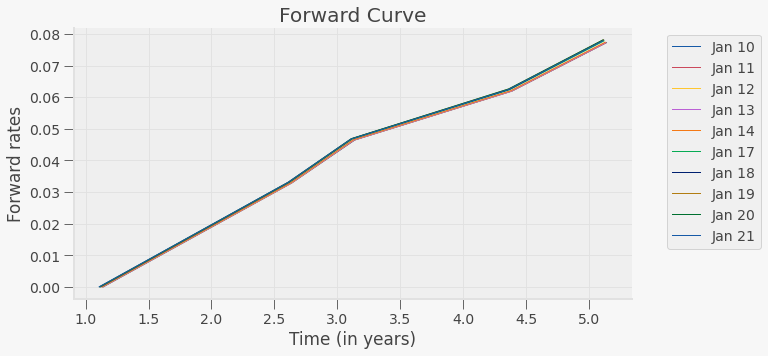

In [12]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(ttm1_5[i], fwd_all[i], label=dates[i], linewidth=1)
plt.xlabel('Time (in years)')
plt.ylabel('Forward rates')
plt.title("Forward Curve")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');